In [1]:
from salishsea_tools import evaltools as et
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import pickle

%matplotlib inline

### Note: Summer only

In [2]:
df=et.loadDFOCTD(datelims=(dt.datetime(2015,6,1),dt.datetime(2015,9,1)))

In [3]:
print(len(df))
df.dropna(subset=['Fluor'],inplace=True)
print(len(df))

54669
41248


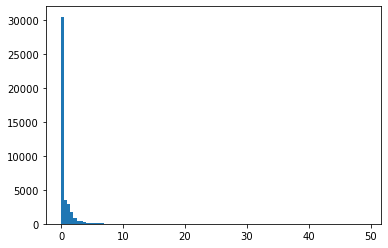

In [4]:
plt.hist(df['Fluor'],100);

In [5]:
# path to model files:
PATH= '/results2/SalishSea/nowcast-green.201905/'

# start and end dates for analysis:
start_date = dt.datetime(2015,6,1)
end_date = dt.datetime(2015,9,1)

# number of days per model file:
flen=1

# dictionary mapping desired model variables to the file types where they are found
#filemap={'vosaline':'grid_T','votemper':'grid_T'}
filemap={'diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T'}

# dictionary mapping model file types to their time resolution in hours (1 is hourly files, 24 is daily)
fdict={'ptrc_T':1,'grid_T':1}

# results format
# -- nowcast: files like 01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc
# -- long: files like SalishSea_1h_20150206_20150804_ptrc_T_20150427-20150506.nc, all in one directory
namfmt='nowcast'

data=et.matchData(df,filemap,fdict,start_date,end_date,namfmt,PATH)

(Lat,Lon)= 49.01133333333333 -125.17  not matched to domain
(Lat,Lon)= 49.021 -125.15616666666666  not matched to domain
(Lat,Lon)= 49.0295 -125.15266666666666  not matched to domain
(Lat,Lon)= 49.042833333333334 -125.15266666666666  not matched to domain
(Lat,Lon)= 49.0525 -125.143  not matched to domain
(Lat,Lon)= 49.071333333333335 -125.15683333333334  not matched to domain
(Lat,Lon)= 49.08316666666666 -125.17166666666667  not matched to domain
(Lat,Lon)= 49.09166666666667 -125.19466666666666  not matched to domain
(Lat,Lon)= 50.45713333333333 -126.16475  not matched to domain
(Lat,Lon)= 50.45718333333333 -126.16443333333333  not matched to domain
(Lat,Lon)= 50.45745 -126.16433333333333  not matched to domain
(Lat,Lon)= 50.48383333333334 -126.18633333333334  not matched to domain
(Lat,Lon)= 51.67483333333333 -127.28466666666667  not matched to domain
(Lat,Lon)= 51.678 -127.334  not matched to domain
progress: 0.0%
progress: 12.57134236793805%
progress: 25.1426847358761%
progress: 37

In [6]:
mod_chl_N=1.6
#mod_chl_N=2.0
data['l10_obsChl']=np.log10(data['Fluor']+0.01)
data['l10_modChl']=np.log10(mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.01)
data['mod_Chl']=mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])

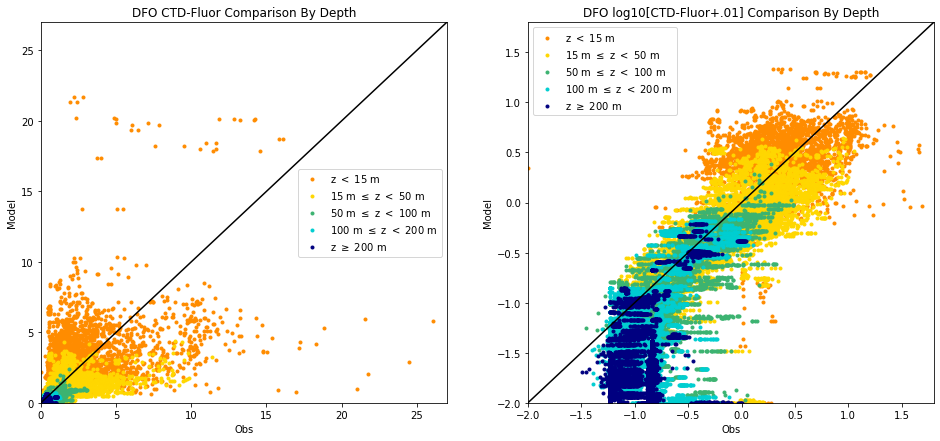

In [7]:
fig, ax = plt.subplots(1,2,figsize = (16,7))
ps=et.varvarPlot(ax[0],data,'Fluor','mod_Chl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
ax[0].legend(handles=ps)
ax[0].set_xlabel('Obs')
ax[0].set_ylabel('Model')
ax[0].set_title('DFO CTD-Fluor Comparison By Depth')
ps=et.varvarPlot(ax[1],data,'l10_obsChl','l10_modChl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
ax[1].legend(handles=ps)
ax[1].set_xlabel('Obs')
ax[1].set_ylabel('Model')
ax[1].set_title('DFO log10[CTD-Fluor+.01] Comparison By Depth')
ax[0].set_xlim(0,27)
ax[0].set_ylim(0,27)
ax[0].plot((0,27),(0,27),'k-')
ax[1].set_xlim(-2,1.8)
ax[1].set_ylim(-2,1.8)
ax[1].plot((-2,1.8),(-2,1.8),'k-')

In [8]:
cver = "BIO"
clusterD='/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/'
cfile = {2013:"BIO_clno_5_2013_reass.pkl",2014:"BIO_clno_5_2014_reass.pkl", 
         2015: "BIO_clno_5_2015_reass.pkl", 2016: "BIO_clno_5_2016_reass.pkl"}
cxf='Xcoords_for571_stations.pkl'
cyf='Ycoords_for571_stations.pkl'
print('Cluster version is:', cver)
# papermill reads dictionary keys as strings, so add code to correct this
cfile2=dict()
for key,val in cfile.items():
    cfile2[int(key)]=val
cfile=cfile2
cx=pickle.load(open(clusterD+cxf, 'rb'))
cy=pickle.load(open(clusterD+cyf, 'rb'))
cf=dict()
for iyear in cfile.keys():
    cf[iyear]=pickle.load(open(clusterD+cfile[iyear],'rb'))

def round2(num):
    return int(np.trunc((num+2)/10)*10+2)

data['Cluster']=np.zeros(len(data))
for ir, row in data.iterrows():
    ii=(cx==round2(row['i']))&(cy==round2(row['j']))
    if sum(ii)==1:
        cluster=cf[row['Year']][ii]
        data.at[ir,'Cluster']=int(cluster)

Cluster version is: BIO


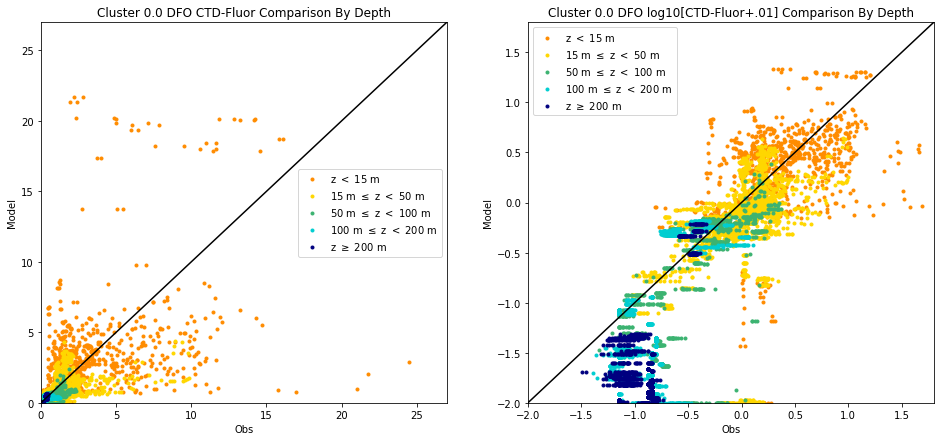

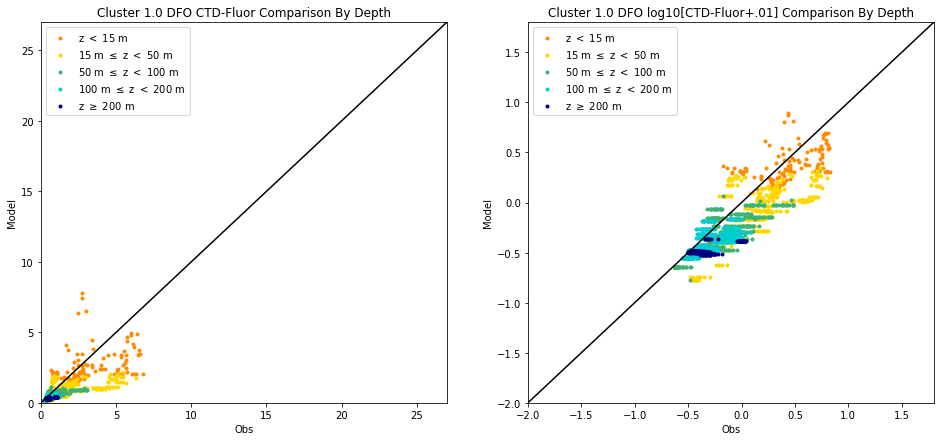

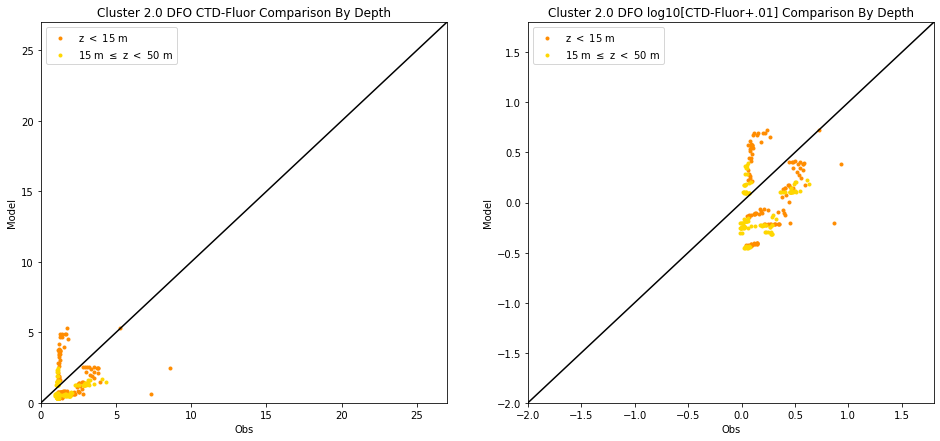

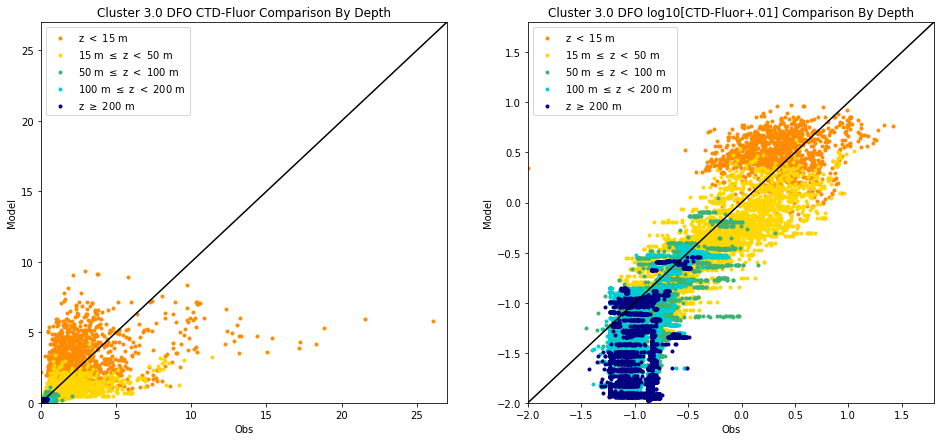

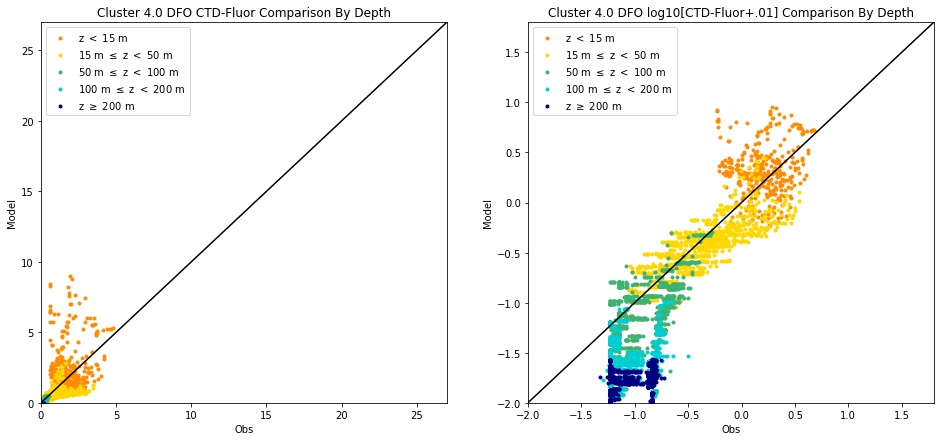

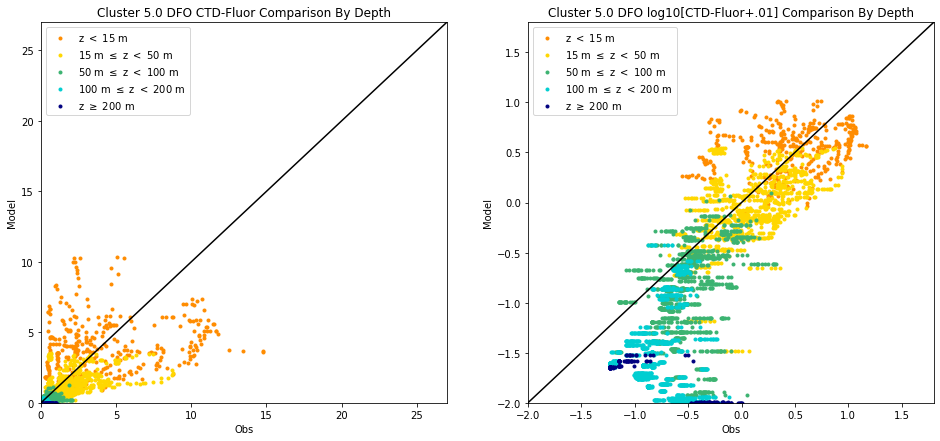

In [9]:
for ic in np.unique(data['Cluster']):
    idata=data.loc[data.Cluster==ic]
    fig, ax = plt.subplots(1,2,figsize = (16,7))
    ps=et.varvarPlot(ax[0],idata,'Fluor','mod_Chl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
    ax[0].legend(handles=ps)
    ax[0].set_xlabel('Obs')
    ax[0].set_ylabel('Model')
    ax[0].set_title(f'Cluster {ic} DFO CTD-Fluor Comparison By Depth')
    ps=et.varvarPlot(ax[1],idata,'l10_obsChl','l10_modChl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
    ax[1].legend(handles=ps)
    ax[1].set_xlabel('Obs')
    ax[1].set_ylabel('Model')
    ax[1].set_title(f'Cluster {ic} DFO log10[CTD-Fluor+.01] Comparison By Depth')
    ax[0].set_xlim(0,27)
    ax[0].set_ylim(0,27)
    ax[0].plot((0,27),(0,27),'k-')
    ax[1].set_xlim(-2,1.8)
    ax[1].set_ylim(-2,1.8)
    ax[1].plot((-2,1.8),(-2,1.8),'k-')

    

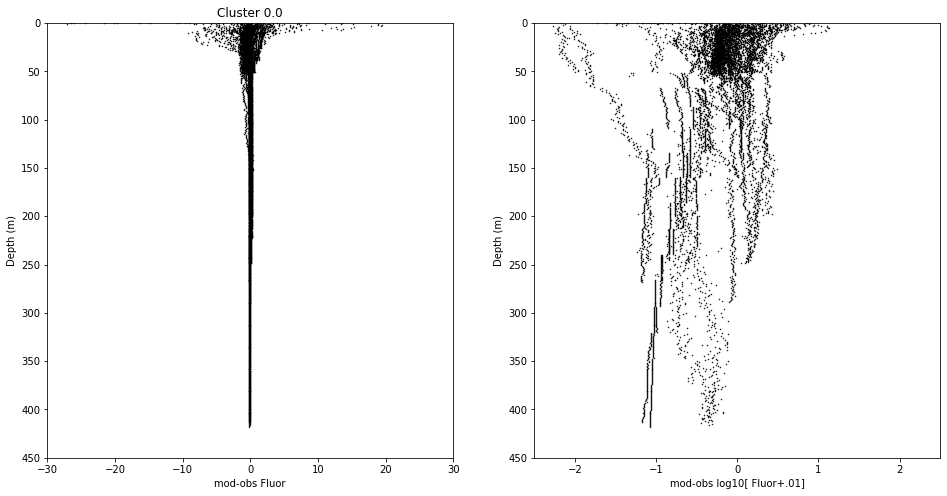

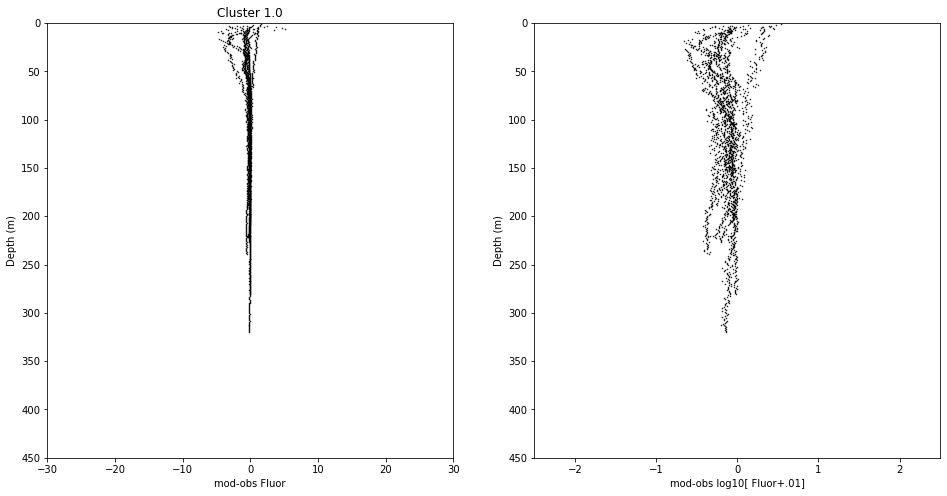

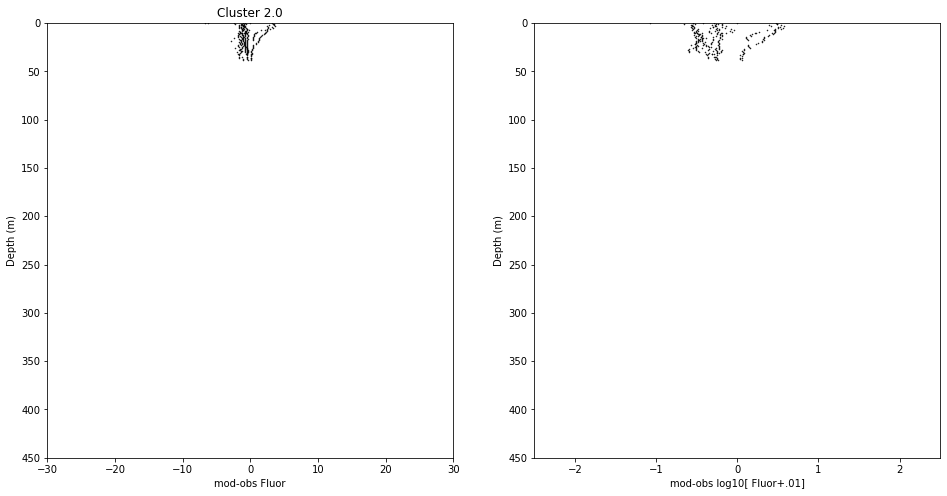

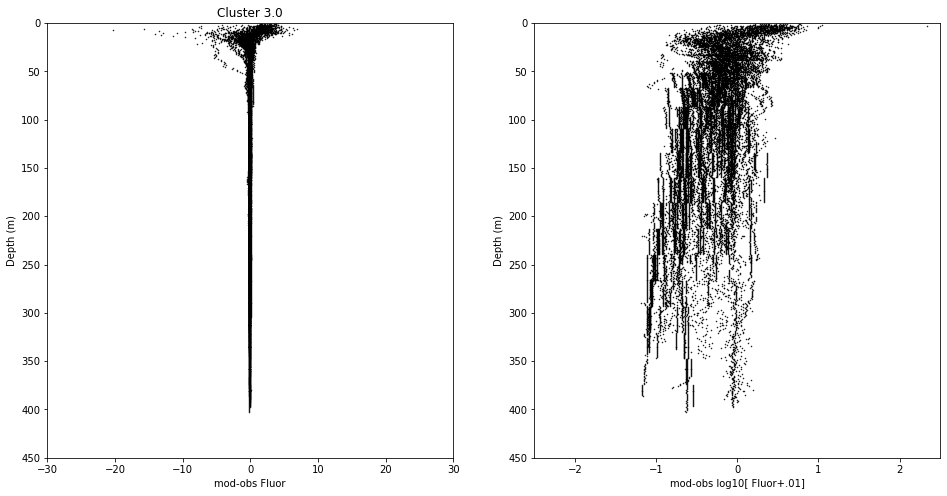

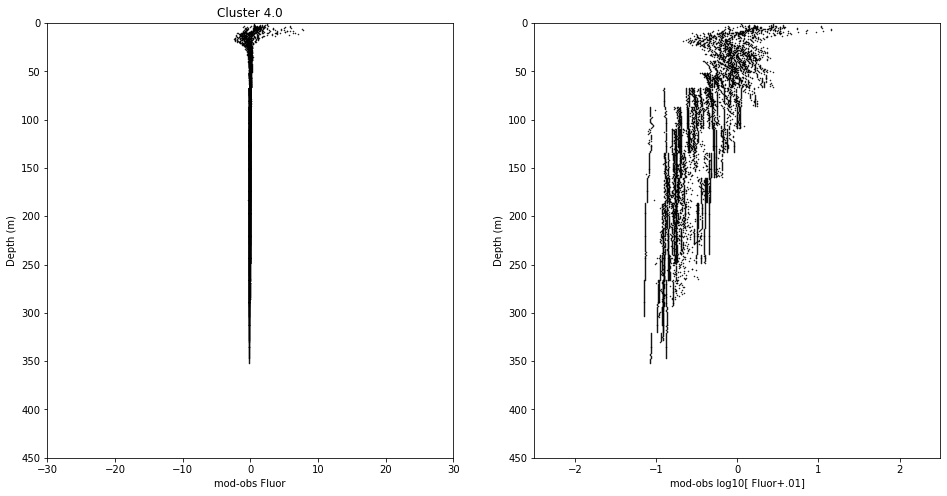

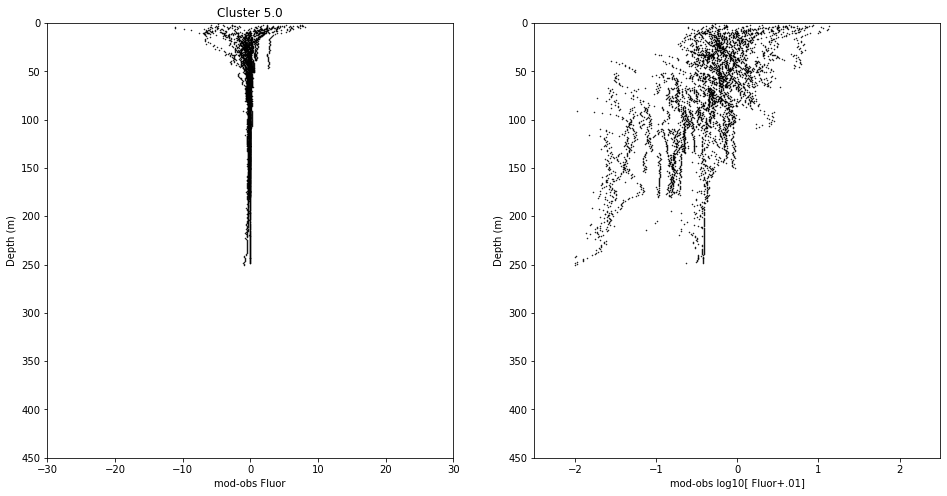

In [10]:
for ic in np.unique(data['Cluster']):
    idata=data.loc[data.Cluster==ic]
    fig, ax = plt.subplots(1,2,figsize = (16,8))
    ax[0].plot(idata['mod_Chl']-idata['Fluor'],idata['Z'],'k.',ms=1)
    ax[1].plot(idata['l10_modChl']-idata['l10_obsChl'],idata['Z'],'k.',ms=1)
    ax[0].set_ylim(450,0)
    ax[1].set_ylim(450,0)
    ax[0].set_xlim(-30,30)
    ax[1].set_xlim(-2.5,2.5)
    ax[0].set_title('Cluster '+str(ic))
    ax[0].set_xlabel('mod-obs Fluor')
    ax[1].set_xlabel('mod-obs log10[ Fluor+.01]')
    ax[0].set_ylabel('Depth (m)')
    ax[1].set_ylabel('Depth (m)')

In [11]:
np.unique(data['Cluster'])

array([0., 1., 2., 3., 4., 5.])

Text(0, 0.5, 'Depth (m)')

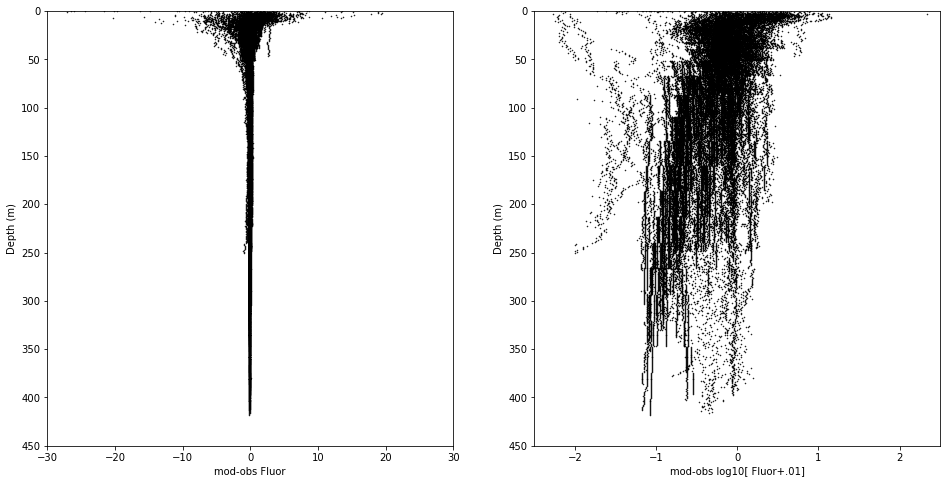

In [12]:
    fig, ax = plt.subplots(1,2,figsize = (16,8))
    ax[0].plot(data['mod_Chl']-data['Fluor'],data['Z'],'k.',ms=1)
    ax[1].plot(data['l10_modChl']-data['l10_obsChl'],data['Z'],'k.',ms=1)
    ax[0].set_ylim(450,0)
    ax[1].set_ylim(450,0)
    ax[0].set_xlim(-30,30)
    ax[1].set_xlim(-2.5,2.5)
    ax[0].set_xlabel('mod-obs Fluor')
    ax[1].set_xlabel('mod-obs log10[ Fluor+.01]')
    ax[0].set_ylabel('Depth (m)')
    ax[1].set_ylabel('Depth (m)')

In [13]:
print('Surface Chl:')
print('all:')
et.printstats(data.loc[data.Z<10,:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z<10),:],'Fluor','mod_Chl')

Surface Chl:
all:
  N: 2212
  bias: 0.3562330089298471
  RMSE: 4.00206050760528
  WSS: 0.4831317561743952
cluster 0
  N: 877
  bias: -0.33535757737863037
  RMSE: 5.299337379391177
  WSS: 0.4681124396178885
cluster 1
  N: 73
  bias: -0.3840990974413203
  RMSE: 1.9267603932377966
  WSS: 0.5783007615520377
cluster 2
  N: 73
  bias: -0.2163456365261991
  RMSE: 2.030287873508617
  WSS: 0.3690254252459937
cluster 3
  N: 746
  bias: 1.0781766869416192
  RMSE: 2.716092933922555
  WSS: 0.5393124538928171
cluster 4
  N: 215
  bias: 1.2431885678701629
  RMSE: 2.10262248023063
  WSS: 0.4446847855865522
cluster 5
  N: 228
  bias: 0.238259325188503
  RMSE: 4.068440481360596
  WSS: 0.3758188832456779


In [14]:
for icl in range(0,6):
    print('cluster',icl)
    print(np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<10),['Fluor']].values),np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<10),['mod_Chl']].values))

cluster 0
3.312780432309442 2.96919202353357
cluster 1
3.320712328767123 2.936613231325803
cluster 2
2.154109589041096 1.9377639525148969
cluster 3
2.7287587131367292 3.8069354000783484
cluster 4
1.6458558139534882 2.889044381823651
cluster 5
4.616969298245613 4.855228623434116


In [15]:
print('10-20m Chl:')
print('all:')
et.printstats(data.loc[(data.Z>=10)&(data.Z<20),:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z>=10)&(data.Z<20),:],'Fluor','mod_Chl')

10-20m Chl:
all:
  N: 2426
  bias: -0.6179626255114983
  RMSE: 1.898495679277558
  WSS: 0.5457750671660174
cluster 0
  N: 831
  bias: -0.5081946367675165
  RMSE: 1.6804005158935664
  WSS: 0.6010142354418877
cluster 1
  N: 90
  bias: -1.2577015767309407
  RMSE: 1.9304418676377804
  WSS: 0.5385886295963903
cluster 2
  N: 72
  bias: -0.48981877191199197
  RMSE: 1.2348013682614611
  WSS: 0.4120562407369398
cluster 3
  N: 882
  bias: -0.7438900723143769
  RMSE: 2.1534170853501178
  WSS: 0.4968985296898455
cluster 4
  N: 271
  bias: -0.2285555679965281
  RMSE: 1.3063439875452783
  WSS: 0.4647705776320129
cluster 5
  N: 280
  bias: -0.7512781790903631
  RMSE: 2.2359109703931956
  WSS: 0.4811954317136684


In [16]:
print('20-30m Chl:')
print('all:')
et.printstats(data.loc[(data.Z>=20)&(data.Z<30),:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z>=20)&(data.Z<30),:],'Fluor','mod_Chl')

20-30m Chl:
all:
  N: 2370
  bias: -0.4534914822267593
  RMSE: 1.068034963332837
  WSS: 0.5815057678971203
cluster 0
  N: 796
  bias: -0.42292966843700075
  RMSE: 1.0366551547721277
  WSS: 0.49524802023705594
cluster 1
  N: 90
  bias: -1.077993795129988
  RMSE: 1.6805671062581466
  WSS: 0.4600569225755202
cluster 2
  N: 60
  bias: -0.7444127032756804
  RMSE: 1.0181750057110779
  WSS: 0.4671578161654878
cluster 3
  N: 874
  bias: -0.4273173914092083
  RMSE: 1.002273467911514
  WSS: 0.5637478617225995
cluster 4
  N: 270
  bias: -0.181951798861115
  RMSE: 0.38082162267707154
  WSS: 0.5956768456591632
cluster 5
  N: 280
  bias: -0.6208435973542077
  RMSE: 1.4814419920364237
  WSS: 0.5521096288207644


In [17]:
print('30-40m Chl:')
print('all:')
et.printstats(data.loc[(data.Z>=30)&(data.Z<40),:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z>=30)&(data.Z<40),:],'Fluor','mod_Chl')

30-40m Chl:
all:
  N: 2305
  bias: -0.25104129929650254
  RMSE: 0.7136934230835827
  WSS: 0.664084891995878
cluster 0
  N: 765
  bias: -0.3035580083074154
  RMSE: 0.6480872238117025
  WSS: 0.6632378747783282
cluster 1
  N: 90
  bias: -0.6780645815412205
  RMSE: 1.155320779310618
  WSS: 0.4625713151741848
cluster 2
  N: 30
  bias: -0.5767526114384335
  RMSE: 0.866313004157963
  WSS: 0.5772585575136379
cluster 3
  N: 870
  bias: -0.15389051789430697
  RMSE: 0.6185445174668422
  WSS: 0.5207560123819156
cluster 4
  N: 270
  bias: -0.018207848451976427
  RMSE: 0.14494483846038106
  WSS: 0.7713462500460899
cluster 5
  N: 280
  bias: -0.461782350683292
  RMSE: 1.151988726695673
  WSS: 0.5057650022652758


In [18]:
print('50-70m')
for icl in range(0,6):
    print('cluster',icl)
    print(np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<70)&(data.Z>50),['Fluor']].values),np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<70)&(data.Z>50),['mod_Chl']].values))

50-70m
cluster 0
0.6199100719424461 0.40734064434258044
cluster 1
0.9654277777777777 0.5893392330408095
cluster 2
nan nan
cluster 3
0.20357728337236536 0.12679411850480332
cluster 4
0.15705740740740742 0.11911456032242211
cluster 5
0.475788888888889 0.2746805356383427


<ipython-input-18-862f938f948e>:4: RuntimeWarning: Mean of empty slice
  print(np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<70)&(data.Z>50),['Fluor']].values),np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<70)&(data.Z>50),['mod_Chl']].values))
<ipython-input-18-862f938f948e>:4: RuntimeWarning: Mean of empty slice
  print(np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<70)&(data.Z>50),['Fluor']].values),np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<70)&(data.Z>50),['mod_Chl']].values))


In [19]:
test=et.loadDFOCTD()

In [20]:
np.min(test['dtUTC'])

Timestamp('2014-01-15 17:27:56')

In [21]:
np.max(test['dtUTC'])

Timestamp('2020-03-20 14:51:36')